In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamina
Processing Record 2 of Set 1 | ashcroft
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | terrace bay
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | sterling
Processing Record 8 of Set 1 | mocuba
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | khandyga
Processing Record 11 of Set 1 | matara
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | tagusao
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | adre
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | progreso
Processing

Processing Record 38 of Set 4 | kharp
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | bahir dar
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | hokitika
Processing Record 43 of Set 4 | gardan diwal
City not found. Skipping...
Processing Record 44 of Set 4 | christchurch
Processing Record 45 of Set 4 | sao felix do xingu
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | lakselv
Processing Record 48 of Set 4 | tamano
Processing Record 49 of Set 4 | port alfred
Processing Record 50 of Set 4 | longjiang
Processing Record 1 of Set 5 | kanker
Processing Record 2 of Set 5 | bodden town
Processing Record 3 of Set 5 | aykhal
Processing Record 4 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 5 | tessalit
Processing Record 6 of Set 5 | barrow
Processing Record 7 of Set 5 | fairbanks
Processing Record 8 of Set 5 | zatoka
Processing Record 9 of Set 5 | cheremukhovo
Processing Record 10 of Set

Processing Record 26 of Set 8 | bubaque
Processing Record 27 of Set 8 | lima
Processing Record 28 of Set 8 | hovd
Processing Record 29 of Set 8 | tahe
Processing Record 30 of Set 8 | labutta
City not found. Skipping...
Processing Record 31 of Set 8 | coquimbo
Processing Record 32 of Set 8 | fare
Processing Record 33 of Set 8 | ueda
Processing Record 34 of Set 8 | mahajanga
Processing Record 35 of Set 8 | puerto escondido
Processing Record 36 of Set 8 | mahanoro
Processing Record 37 of Set 8 | buin
Processing Record 38 of Set 8 | berlevag
Processing Record 39 of Set 8 | nagato
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | igarka
Processing Record 42 of Set 8 | pimenta bueno
Processing Record 43 of Set 8 | aquidauana
Processing Record 44 of Set 8 | panji
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | forbes
Processing Record 47 of Set 8 | redlands
Processing Record 48 of Set 8 | tsumeb
Processing Record 49 of Set 8 | malanje
Process

Processing Record 17 of Set 12 | rajpipla
Processing Record 18 of Set 12 | blue island
Processing Record 19 of Set 12 | danilov
Processing Record 20 of Set 12 | waraseoni
Processing Record 21 of Set 12 | alindao
Processing Record 22 of Set 12 | itapaci
Processing Record 23 of Set 12 | waingapu
Processing Record 24 of Set 12 | pangkalanbuun
Processing Record 25 of Set 12 | sechura
Processing Record 26 of Set 12 | siocon
Processing Record 27 of Set 12 | marystown
Processing Record 28 of Set 12 | sovetskiy
Processing Record 29 of Set 12 | alta floresta
Processing Record 30 of Set 12 | manicore
Processing Record 31 of Set 12 | san quintin
Processing Record 32 of Set 12 | iquique
Processing Record 33 of Set 12 | nemuro
Processing Record 34 of Set 12 | namatanai
Processing Record 35 of Set 12 | mabaruma
Processing Record 36 of Set 12 | nyurba
Processing Record 37 of Set 12 | chulman
Processing Record 38 of Set 12 | marawi
Processing Record 39 of Set 12 | phimai
Processing Record 40 of Set 12

In [10]:
len(city_data)

567

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamina,-8.7386,24.9906,61.30,98,67,2.68,CD,2021-01-17 02:17:12
1,Ashcroft,50.7165,-121.2859,33.80,80,90,4.61,CA,2021-01-17 02:17:12
2,Nikolskoye,59.7035,30.7861,14.00,85,90,8.95,RU,2021-01-17 02:17:12
3,Terrace Bay,48.7834,-87.1000,15.80,79,100,9.22,CA,2021-01-17 02:17:12
4,Atuona,-9.8000,-139.0333,77.49,76,1,13.87,PF,2021-01-17 02:17:12
5,Mar Del Plata,-38.0023,-57.5575,64.99,77,90,8.05,AR,2021-01-17 02:14:31
6,Sterling,39.0062,-77.4286,37.99,60,1,8.05,US,2021-01-17 02:15:53
7,Mocuba,-16.8392,36.9856,75.97,87,83,2.48,MZ,2021-01-17 02:17:12
8,Albany,42.6001,-73.9662,37.00,67,100,5.01,US,2021-01-17 02:15:27
9,Khandyga,62.6667,135.6000,-39.91,81,100,0.78,RU,2021-01-17 02:12:14


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamina,CD,2021-01-17 02:17:12,-8.7386,24.9906,61.30,98,67,2.68
1,Ashcroft,CA,2021-01-17 02:17:12,50.7165,-121.2859,33.80,80,90,4.61
2,Nikolskoye,RU,2021-01-17 02:17:12,59.7035,30.7861,14.00,85,90,8.95
3,Terrace Bay,CA,2021-01-17 02:17:12,48.7834,-87.1000,15.80,79,100,9.22
4,Atuona,PF,2021-01-17 02:17:12,-9.8000,-139.0333,77.49,76,1,13.87


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

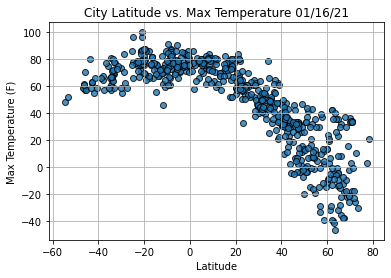

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

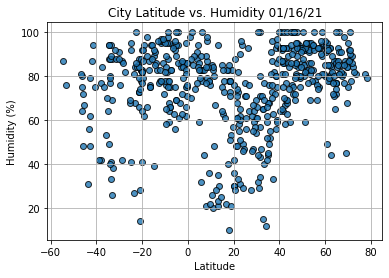

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

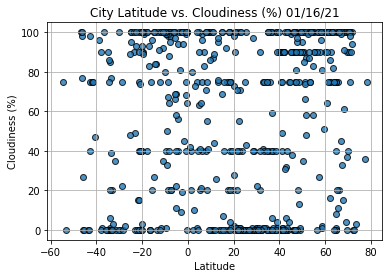

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

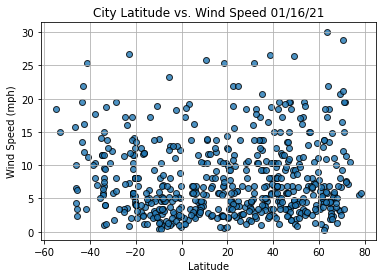

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()